In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import matplotlib
from numpy import inf
from scipy import stats
import scipy as sp

matplotlib.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
pati = pd.read_csv('서울_전국_코로나.csv').drop(columns='Unnamed: 0')
popu = pd.read_csv('local_people_melt.csv')

In [3]:
popu['GU_NM'] = popu['G_DNG_NM'].str[:6]

In [4]:
popu = popu.query('9<=시간대구분<=21')

In [5]:
pati0 = pd.melt(pati, id_vars='날짜', value_name='CONT', var_name='구분')

In [6]:
pati0

,날짜,구분,CONT
0,2020-01-24,중구 신규 확진자,0.0
1,2020-01-25,중구 신규 확진자,0.0
2,2020-01-26,중구 신규 확진자,0.0
3,2020-01-27,중구 신규 확진자,0.0
4,2020-01-28,중구 신규 확진자,0.0
...,...,...,...
727,2020-07-19,전국 신규 확진자,4.0
728,2020-07-20,전국 신규 확진자,20.0
729,2020-07-21,전국 신규 확진자,29.0
730,2020-07-22,전국 신규 확진자,39.0


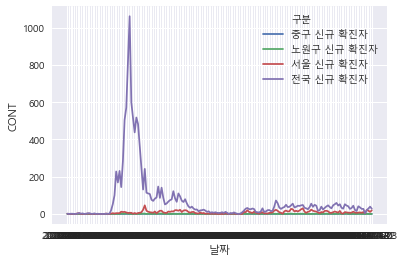

In [7]:
sns.lineplot(data = pati0,x='날짜',y='CONT',hue='구분')

In [8]:
pati.set_index('날짜').corr()
# 서울과 중구의 상관계수가 가장 높음

,중구 신규 확진자,노원구 신규 확진자,서울 신규 확진자,전국 신규 확진자
중구 신규 확진자,1.000000,-0.029835,0.292162,-0.034426
노원구 신규 확진자,-0.029835,1.000000,0.377663,0.205131
서울 신규 확진자,0.292162,0.377663,1.000000,0.086657
전국 신규 확진자,-0.034426,0.205131,0.086657,1.000000


In [9]:
df1 = popu.groupby(['GU_NM','시간대구분','STD_DD'])['FLOW'].sum().reset_index()
df2 = df1.groupby(['GU_NM','STD_DD'])['FLOW'].mean().reset_index()

In [10]:
df2 = pd.pivot(data=df2,index='STD_DD',values='FLOW',columns='GU_NM')

In [11]:
pati = pati.rename(columns={'날짜':'STD_DD'})

In [12]:
dfdf = pd.merge(pati,df2,on='STD_DD')

In [13]:
dfdf = dfdf.loc[dfdf['STD_DD']<'2020-05-06',:]
dfdf['period'] = np.where(dfdf['STD_DD']<'2020-02-21','normal',np.where(dfdf['STD_DD']<'2020-03-16','spread',np.where(dfdf['STD_DD']<'2020-03-22','ease','resliance')))

In [14]:
dfdf.query('period == "normal"').drop(columns='period').set_index('STD_DD').corr().fillna(0)
# 서울 신규확진자와 전국 신규 확진자(0.83)
# 서울 노원구 유동인구와 전국 신규 확진자(-0.23)
# 전국 신규 확진자와 서울 중구 유동인구(0.189)

,중구 신규 확진자,노원구 신규 확진자,서울 신규 확진자,전국 신규 확진자,서울 노원구,서울 중구
중구 신규 확진자,0.0,0.0,0.000000,0.000000,0.000000,0.000000
노원구 신규 확진자,0.0,0.0,0.000000,0.000000,0.000000,0.000000
서울 신규 확진자,0.0,0.0,1.000000,0.835707,-0.156001,0.124557
전국 신규 확진자,0.0,0.0,0.835707,1.000000,-0.234090,0.189505
서울 노원구,0.0,0.0,-0.156001,-0.234090,1.000000,-0.990061
서울 중구,0.0,0.0,0.124557,0.189505,-0.990061,1.000000


In [15]:
dfdf.query('period == "spread"').drop(columns='period').set_index('STD_DD').corr().fillna(0)
# 서울 신규 확진자와 노원구 신규 확진자(0.497), 그리고 서울 신규 확진자와 서울 노원구 유동인구(-0.238)
# 중구 신규 확진자와 서울 신규 확진자(0.29)
# 전국 신규 확진자와 서울 신규 확진자(-0.246)

,중구 신규 확진자,노원구 신규 확진자,서울 신규 확진자,전국 신규 확진자,서울 노원구,서울 중구
중구 신규 확진자,1.000000,0.096909,0.296873,-0.173055,-0.145244,0.133858
노원구 신규 확진자,0.096909,1.000000,0.497524,-0.067370,-0.187817,0.186886
서울 신규 확진자,0.296873,0.497524,1.000000,-0.246486,-0.238860,0.211749
전국 신규 확진자,-0.173055,-0.067370,-0.246486,1.000000,0.190903,-0.157424
서울 노원구,-0.145244,-0.187817,-0.238860,0.190903,1.000000,-0.986143
서울 중구,0.133858,0.186886,0.211749,-0.157424,-0.986143,1.000000


In [16]:
dfdf.query('period == "resliance"').drop(columns='period').set_index('STD_DD').corr().fillna(0)
# 전국 신규 확진자와 서울 신규 확진자(0.88)
# 전국 신규 확진자와 중구 신규 확진자(0.582)
# 서울 신규 확진자와 중구 신규 확진자(0.461)
# 

,중구 신규 확진자,노원구 신규 확진자,서울 신규 확진자,전국 신규 확진자,서울 노원구,서울 중구
중구 신규 확진자,1.000000,-0.094491,0.461982,0.582802,-0.069107,0.127327
노원구 신규 확진자,-0.094491,1.000000,0.333705,0.211722,-0.156819,0.186221
서울 신규 확진자,0.461982,0.333705,1.000000,0.881874,0.083782,0.059439
전국 신규 확진자,0.582802,0.211722,0.881874,1.000000,-0.014596,0.163272
서울 노원구,-0.069107,-0.156819,0.083782,-0.014596,1.000000,-0.874260
서울 중구,0.127327,0.186221,0.059439,0.163272,-0.874260,1.000000


In [17]:
dfdf.query('period == "ease"').drop(columns='period').set_index('STD_DD').corr().fillna(0)
# 서울 노원구 생활인구와 서울 노원구 신규 확진자(-0.42)
# 

,중구 신규 확진자,노원구 신규 확진자,서울 신규 확진자,전국 신규 확진자,서울 노원구,서울 중구
중구 신규 확진자,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
노원구 신규 확진자,0.0,1.000000,0.805228,0.506156,-0.424808,0.397554
서울 신규 확진자,0.0,0.805228,1.000000,0.299253,-0.313743,0.284277
전국 신규 확진자,0.0,0.506156,0.299253,1.000000,-0.387443,0.299869
서울 노원구,0.0,-0.424808,-0.313743,-0.387443,1.000000,-0.994746
서울 중구,0.0,0.397554,0.284277,0.299869,-0.994746,1.000000
